<a href="https://colab.research.google.com/github/JhowSantiago/tde1_analise_de_dados_e_graficos/blob/main/TDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pacote de processamento dos dados
import pandas as pd
import numpy as np
import csv

# pacote de visualização de dados
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

#Importe a biblioteca os para trabalhar com arquivos e diretórios:
import os
import glob



In [ ]:
!pip install --upgrade gspread

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho_pasta_preco = '/content/drive/MyDrive/Colab Notebooks/Data_Sets/Preços_Combustivel/Mensal_Brasil'
nome_arquivo = 'preco_gasolina_2006_2022.csv'

precos_gasolina = dict()

# Lendo o arquivo CSV com os dados de preço da gasolina
df = pd.read_csv(os.path.join(caminho_pasta_preco, nome_arquivo), header=0, delimiter=',')

for index, row in df.iterrows():
    # Obtendo o ano a partir do campo 'MÊS' do DataFrame
    ano = '20' + row['MÊS'].split('-')[-1]
    if ano not in precos_gasolina:
        precos_gasolina[ano] = list()
    # Armazenando os preços médios de revenda por ano
    precos_gasolina[ano].append(row['PRECO MÉDIO REVENDA'])

# Calculando a média dos preços de revenda por ano
for ano, valores in precos_gasolina.items():
    precos_gasolina[ano] = round(sum(valores) / len(valores), 3)

print(precos_gasolina)

{'2006': 2.552, '2007': 2.508, '2008': 2.5, '2009': 2.511, '2010': 2.566, '2011': 2.731, '2012': 2.736, '2013': 2.854, '2014': 2.975, '2015': 3.343, '2016': 3.68, '2017': 3.767, '2018': 4.409, '2019': 4.378, '2020': 4.279, '2021': 5.781, '2022': 6.113}


In [ ]:
caminho_pasta = "/content/drive/MyDrive/Colab Notebooks/Data_Sets/Produção_Combustivel"

lista_producao_mar = glob.glob(caminho_pasta + '/producao_mar/*.csv')
lista_producao_terra = glob.glob(caminho_pasta + '/producao_terra/*.csv')

bases_de_dados = {'terra': {}, 'mar': {}}

for arquivo in lista_producao_terra:
    ano = os.path.splitext(os.path.basename(arquivo))[0].split('_')[0]
    dataframe = pd.read_csv(arquivo, usecols=['Estado','Período','Petróleo (bbl/dia)'], header=0, delimiter=';', low_memory=False)
    dataframe = dataframe.dropna()
    dataframe['Estado'] = dataframe['Estado'].str.replace('\ufeff', '')
    dataframe.drop(index=dataframe.loc[dataframe['Estado'] == 'Paraná'].index, inplace=True)
    dataframe['Petróleo (bbl/dia)'] = dataframe['Petróleo (bbl/dia)'].str.replace('.', '').str.replace(',', '.', regex=False).astype(float)
    if ano not in bases_de_dados['terra']: bases_de_dados['terra'][ano] = []
    bases_de_dados['terra'][ano].append(dataframe)

for arquivo in lista_producao_mar:
    ano = os.path.splitext(os.path.basename(arquivo))[0].split('_')[0]
    dataframe = pd.read_csv(arquivo, usecols=['Estado','Período','Petróleo (bbl/dia)'], header=0, delimiter=';', low_memory=False)
    dataframe = dataframe.dropna()
    dataframe['Petróleo (bbl/dia)'] = dataframe['Petróleo (bbl/dia)'].str.replace('.', '').str.replace(',', '.', regex=False).astype(float)
    dataframe['Estado'] = dataframe['Estado'].str.replace('\ufeff', '')
    dataframe.drop(index=dataframe.loc[dataframe['Estado'] == 'Paraná'].index, inplace=True)
    if ano not in bases_de_dados['mar']: bases_de_dados['mar'][ano] = []
    bases_de_dados['mar'][ano].append(dataframe)


# Ordena o dicionário pelo ano
bases_de_dados['terra'] = dict(sorted(bases_de_dados['terra'].items(), key=lambda x: int(x[0])))
bases_de_dados['mar'] = dict(sorted(bases_de_dados['mar'].items(), key=lambda x: int(x[0])))

# Cria um DataFrame para cada tipo (terra e mar) e concatena os DataFrames relacionados
df_terra = pd.concat([pd.concat(dfs) for dfs in bases_de_dados['terra'].values()], ignore_index=True)
df_mar = pd.concat([pd.concat(dfs) for dfs in bases_de_dados['mar'].values()], ignore_index=True)
df_total = pd.concat([df_terra, df_mar], ignore_index=True)


In [ ]:

producao_terra_anos = dict()
producao_mar_anos = dict()
producao_terra_geral = 0
producao_mar_geral = 0

# Calculando a produção de petróleo em terra por ano e a produção total em terra
for ano, arquivos in bases_de_dados['terra'].items():
    concat = pd.concat(arquivos)
    soma = round(sum(concat['Petróleo (bbl/dia)']), 3)
    producao_terra_anos[ano] = soma
    producao_terra_geral+=soma
producao_terra_geral = round(producao_terra_geral, 3)

# Calculando a produção de petróleo no mar por ano e a produção total no mar
for ano, arquivos in bases_de_dados['mar'].items():
    concat = pd.concat(arquivos)
    soma = round(sum(concat['Petróleo (bbl/dia)']), 3)
    producao_mar_anos[ano] = soma
    producao_mar_geral+=soma
producao_mar_geral = round(producao_mar_geral, 3)

producao_todos_os_anos = producao_terra_geral + producao_mar_geral

print(producao_terra_geral, producao_mar_geral, producao_todos_os_anos)

30501974.636 597624877.253 628126851.889


In [ ]:
df_total['Estado'].value_counts()

Rio Grande do Norte    879493
Sergipe                377650
Bahia                  371751
Rio de Janeiro         150240
Ceará                  119694
Espírito Santo          97122
Alagoas                 50396
Amazonas                15623
São Paulo                9808
Maranhão                 4311
Name: Estado, dtype: int64

In [ ]:
df_total

In [ ]:
# Soma os valores da coluna 'Petróleo (bbl/dia)' do DataFrame producao_terra_2020 e armazena na variável total_petróleo
total_petroleo = df_total['Petróleo (bbl/dia)'].sum()

# Arredonda o valor da variável total_petróleo para 3 casas decimais e armazena na variável total_petróleo_formatado
total_petroleo = round(total_petroleo, 3)

# Imprime o valor da variável total_petróleo_formatado
print(total_petroleo)


628126851.891


<ipython-input-19-e006125c2262>:14: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



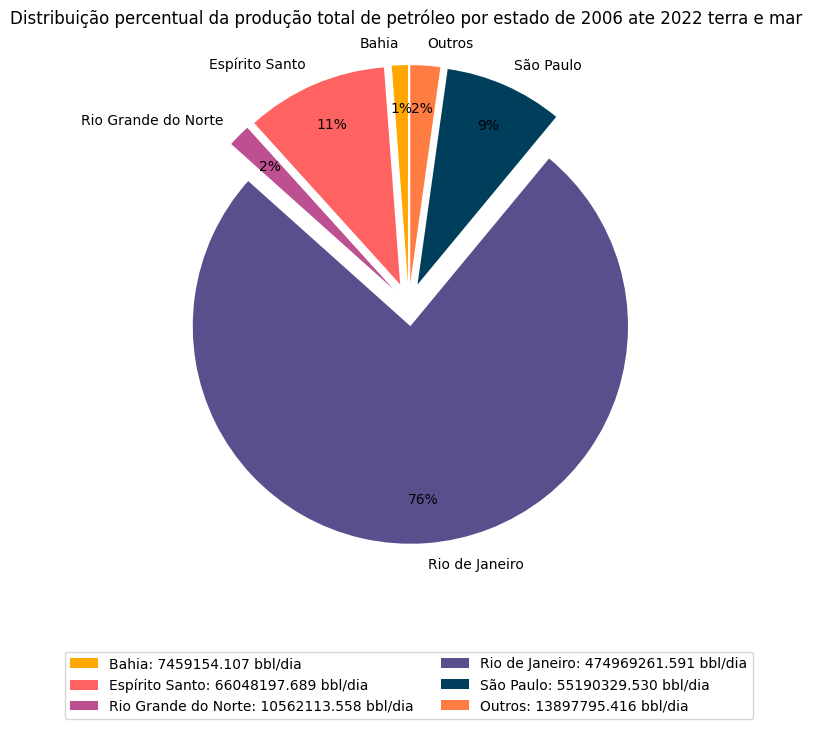

In [ ]:
# Calcular a produção total de petróleo por estado
total_por_estado = df_total.groupby('Estado')['Petróleo (bbl/dia)'].sum()

# Encontrar os estados que representam menos de 1% da produção total
menos_de_1porcento = total_por_estado[total_por_estado / total_por_estado.sum() < 0.01]

# Somar a produção de petróleo de todos os estados que representam menos de 1%
producao_outros = menos_de_1porcento.sum()

# Criar uma nova série com a produção total por estado, exceto pelos estados que representam menos de 1%
total_por_estado_sem_outros = total_por_estado.drop(menos_de_1porcento.index)

# Adicionar uma nova entrada na série para os estados que representam menos de 1%
total_por_estado_com_outros = total_por_estado_sem_outros.append(pd.Series(producao_outros, index=['Outros']))

# Definir as cores para cada estado
cores = ['#ffa600', '#ff6361', '#bc5090', '#58508d', '#003f5c', '#ff7c43', '#dd5182', '#777777']

# Definir o espaçamento uniforme entre as fatias
explode = [0.10] * len(total_por_estado_com_outros)

# Definir as sombras nas fatias
shadow = [True] * len(total_por_estado_com_outros)

# Criar o gráfico de rosca com espaçamento entre as fatias
fig, ax = plt.subplots()
ax.pie(total_por_estado_com_outros, labels=total_por_estado_com_outros.index, colors=cores, autopct='%1.f%%', startangle=90, explode=explode,pctdistance=0.8)
ax.set_title('Distribuição percentual da produção total de petróleo por estado de 2006 ate 2022 terra e mar ')

# Definir a legenda com as cores e a quantidade de petróleo bbl/dia
legenda = [f'{estado}: {petroleo:.3f} bbl/dia' for estado, petroleo in zip(total_por_estado_com_outros.index, total_por_estado_com_outros)]
ax.legend(legenda, loc='center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Aumentar o tamanho do gráfico
fig.set_size_inches(8, 8)

# Definir o espaçamento entre o gráfico e a legenda
plt.subplots_adjust(bottom=0.2)

# Mostrar o gráfico
plt.show()


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

x1 = list(bases_de_dados['terra'].keys())

# Construindo os dados para o primeiro gráfico (Produção de Petróleo)
producao = []
for ano in x1:
    producao.append(producao_terra_anos[ano] + producao_mar_anos[ano])

# Construindo os dados para o segundo gráfico (Preço médio da Gasolina)
precos = list(precos_gasolina.values())

# Criando o gráfico
fig = go.Figure()

# Adicionando o primeiro eixo y (produção)
fig.add_trace(go.Scatter(x=x1, y=producao, name='Produção de Petróleo (bbl/ano)', mode='lines+markers', marker=dict(size=7, color='blue')))
fig.update_layout(yaxis=dict(title='Produção (bbl)'))

# Adicionando o segundo eixo y (preços)
fig.add_trace(go.Scatter(x=x1, y=precos, name='Preço médio da Gasolina por ano (R$/L)', mode='lines+markers', marker=dict(size=7, color='orange'), yaxis='y2'))
fig.update_layout(yaxis2=dict(title='Preço (R$/L)', side='right', overlaying='y'))

# Configurando o layout do gráfico
fig.update_layout(title='Produção de Petróleo x Preço médio da Gasolina por ano', xaxis_title='Ano', height=500)

# Habilitando o modo hover e definindo o formato das informações exibidas no hover
fig.update_layout(hovermode='x', hoverlabel=dict(bgcolor='white', font_size=12))

# Exibindo o gráfico interativo
pio.show(fig)



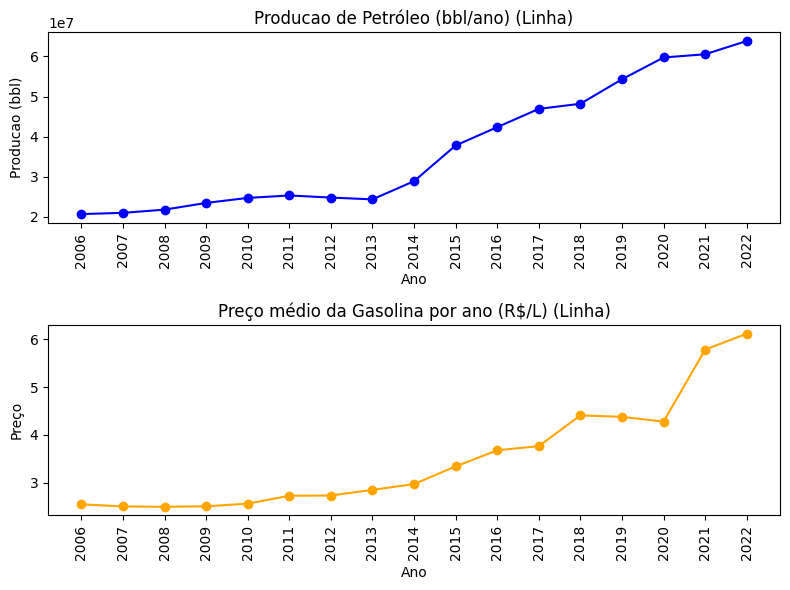

In [ ]:
#Gerar gráficos
import matplotlib.pyplot as plt
import numpy as np

x1 = list(bases_de_dados['terra'].keys())
y1 = list()
y2 = list()

# Construindo os dados para o primeiro gráfico (Produção de Petróleo)
for ano in x1:
    y1.append(producao_terra_anos[ano] + producao_mar_anos[ano])

# Construindo os dados para o segundo gráfico (Preço médio da Gasolina)
for valor in precos_gasolina.values():
    y2.append(valor)


# Criação da figura e dos eixos
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Plotagem do primeiro gráfico
ax1.plot(x1, y1, color='blue', marker='o')
ax1.set_title('Producao de Petróleo (bbl/ano) (Linha)')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Producao (bbl)')
ax1.tick_params(axis='x', rotation=90)

# Plotagem do segundo gráfico
ax2.plot(x1, y2, color='orange', marker='o')
ax2.set_title('Preço médio da Gasolina por ano (R$/L) (Linha)')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Preço')
ax2.tick_params(axis='x', rotation=90)

# Ajustando o espaço entre os subplots
plt.tight_layout()

# Mostrando os dois primeiros graficos
plt.show()


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import numpy as np

x1 = list(bases_de_dados['terra'].keys())

# Construindo os dados para o primeiro gráfico (Produção de Petróleo)
producao = []
for ano in x1:
    producao.append(producao_terra_anos[ano] + producao_mar_anos[ano])

# Construindo os dados para o segundo gráfico (Preço médio da Gasolina)
precos = list(precos_gasolina.values())

# Criando o gráfico
fig = go.Figure()

# Adicionando o primeiro eixo y (produção)
fig.add_trace(go.Bar(x=x1, y=producao, name='Produção de Petróleo (bbl/ano)', marker=dict(color='blue')))
fig.update_layout(yaxis=dict(title='Produção (bbl)'))

# Adicionando o segundo eixo y (preços)
fig.add_trace(go.Scatter(x=x1, y=precos, name='Preço médio da Gasolina por ano (R$/L)', mode='lines+markers', marker=dict(size=7, color='orange'), yaxis='y2'))
fig.update_layout(yaxis2=dict(title='Preço (R$/L)', side='right', overlaying='y', position=1))

# Configurando o layout do gráfico
fig.update_layout(title='Produção de Petróleo x Preço médio da Gasolina por ano', xaxis_title='Ano', height=500, margin=dict(l=50,r=50,t=50,b=50))

# Adicionando informações ao hover
fig.update_traces(hovertemplate='Ano: %{x}<br>Valor: %{y}')

# Habilitando o modo hover
fig.update_layout(hovermode='x')

# Exibindo o gráfico interativo
pio.show(fig)



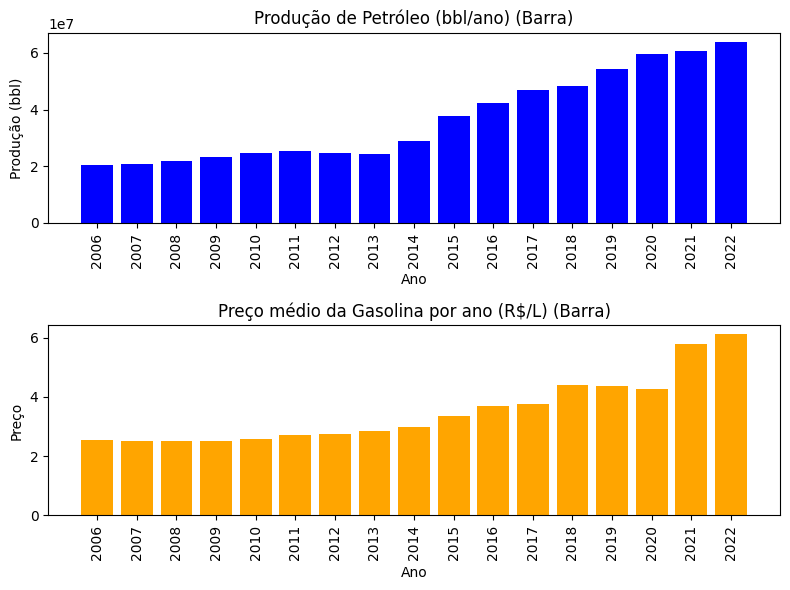

In [ ]:
#Transformando o tamanho da lista em uma variavel para mostrar um ano para cada indice
x = np.arange(len(x1))

#Terceiro e quarto grafico

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
# Plotagem do terceiro gráfico
ax1.bar(x, y1, color='blue')
ax1.set_title('Produção de Petróleo (bbl/ano) (Barra)')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Produção (bbl)')
ax1.set_xticks(x)
ax1.set_xticklabels(x1, rotation=90)

# Plotagem do quarto gráfico
ax2.bar(x, y2, color='orange')
ax2.set_title('Preço médio da Gasolina por ano (R$/L) (Barra)')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Preço')
ax2.set_xticks(x)
ax2.set_xticklabels(x1, rotation=90)

# Ajustando o espaço entre os subplots
plt.tight_layout()

# Mostrando os graficos
plt.show()


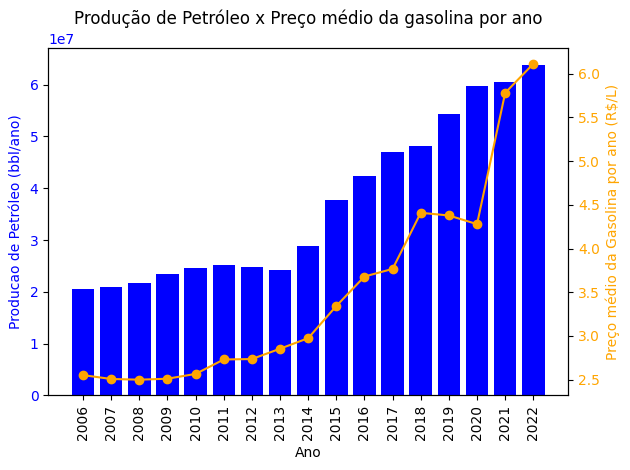

In [ ]:
# Plotagem do quinto gráfico
fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='blue')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Producao de Petróleo (bbl/ano)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um eixo-y secundário para o Preço médio da gasolina
ax2 = ax1.twinx()

# Plotando o preço médio da gasolina
ax2.plot(x, y2, color='orange', marker='o')
ax2.set_ylabel('Preço médio da Gasolina por ano (R$/L)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax1.set_xticks(x)
ax1.set_xticklabels(x1, rotation=90)
plt.title('Produção de Petróleo x Preço médio da gasolina por ano')

# Mostrando o quinto gráfico
plt.tight_layout()
plt.show()